## Importing logs

In [219]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd

In [148]:
# proc_logs = {}

In [141]:
CLOCK_SPEED = '561-param' # CHANGE THIS EVERYTIME

In [142]:
proc_logs[CLOCK_SPEED] = []
for i in range(3):
    infile = "../data/process" + str(i) + ".log"
    with open(infile) as f:
        f = f.readlines()
        proc_logs[CLOCK_SPEED].append(f)

In [154]:
with open('logs.pkl', 'wb') as file:
    pickle.dump(proc_logs, file)
    
# If we want to load data from saved pkl file:
# proc_logs = pickle.load(open("logs.pkl", "rb"))

In [153]:
proc_logs.keys()

dict_keys(['216', '125-param', '611-param', '145-param', '445', '561-param'])

## Analyzing message type breakdown

In [144]:
for k in proc_logs.keys():
    print(k)
    for i in range(3):
        proc_info = proc_logs[k][i]
        total = len(proc_info)
        combined_str = ''.join(proc_info)
        internal = str(round(combined_str.count('internal')/total*100, 1))
        receive = str(round(combined_str.count('received')/total*100, 1))
        send = str(round(combined_str.count('sending')/total*100, 1))
        print('Process '+str(i)+': '+'Internal: '+internal+', '+'Receive: '+receive+', '+'Send: '+send)
    print()

216
Process 0: Internal: 28.9, Receive: 53.1, Send: 18.0
Process 1: Internal: 1.6, Receive: 98.4, Send: 0.0
Process 2: Internal: 69.3, Receive: 3.4, Send: 27.3

125-param
Process 0: Internal: 0.0, Receive: 99.0, Send: 1.0
Process 1: Internal: 40.9, Receive: 47.7, Send: 11.4
Process 2: Internal: 63.5, Receive: 4.0, Send: 32.5

611-param
Process 0: Internal: 19.8, Receive: 0.2, Send: 80.0
Process 1: Internal: 0.0, Receive: 100.0, Send: 0.0
Process 2: Internal: 0.0, Receive: 98.8, Send: 1.2

145-param
Process 0: Internal: 0.0, Receive: 100.0, Send: 0.0
Process 1: Internal: 5.3, Receive: 74.3, Send: 20.4
Process 2: Internal: 17.2, Receive: 14.1, Send: 68.7

445
Process 0: Internal: 45.8, Receive: 29.9, Send: 24.3
Process 1: Internal: 47.0, Receive: 38.6, Send: 14.3
Process 2: Internal: 53.0, Receive: 21.7, Send: 25.2

561-param
Process 0: Internal: 0.9, Receive: 84.7, Send: 14.5
Process 1: Internal: 8.2, Receive: 10.8, Send: 81.0
Process 2: Internal: 0.0, Receive: 98.6, Send: 1.4



## Plotting message queue length frequenices

key: 216


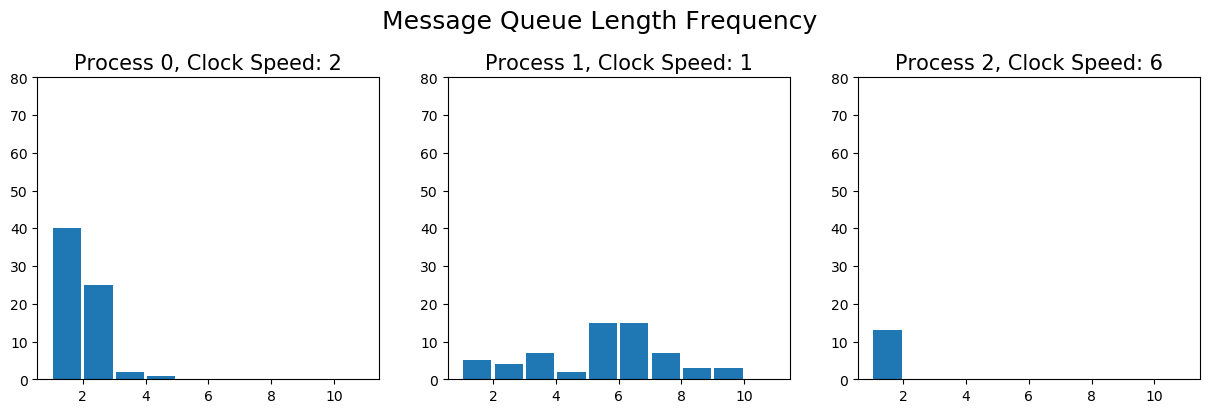


key: 125-param


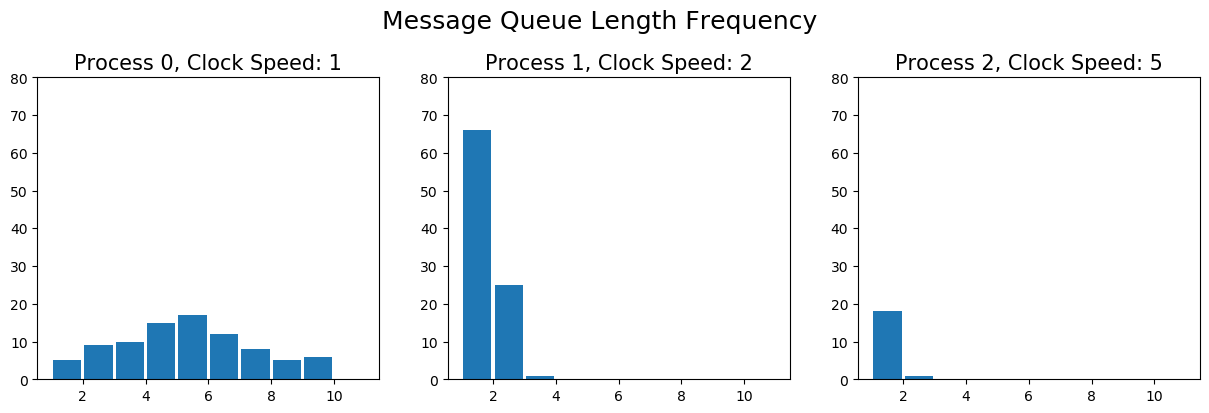


key: 611-param


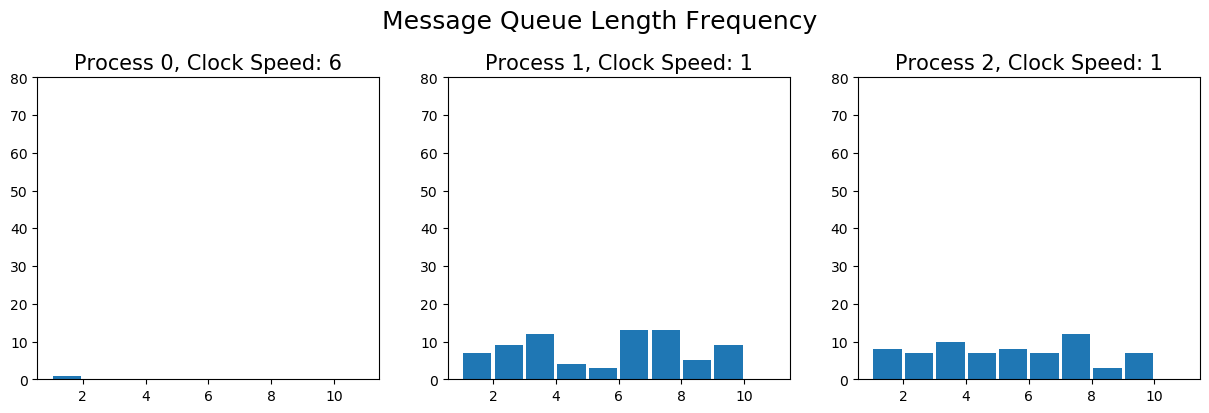


key: 145-param


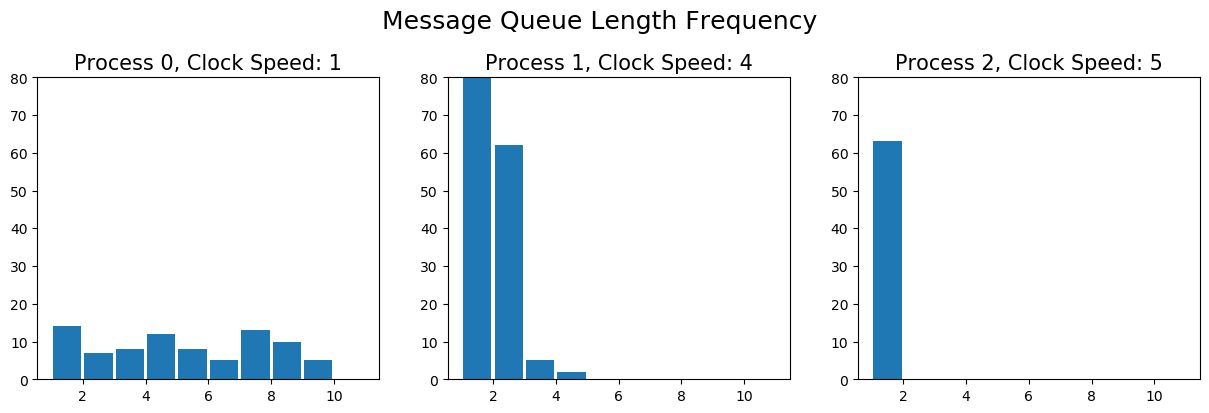


key: 445


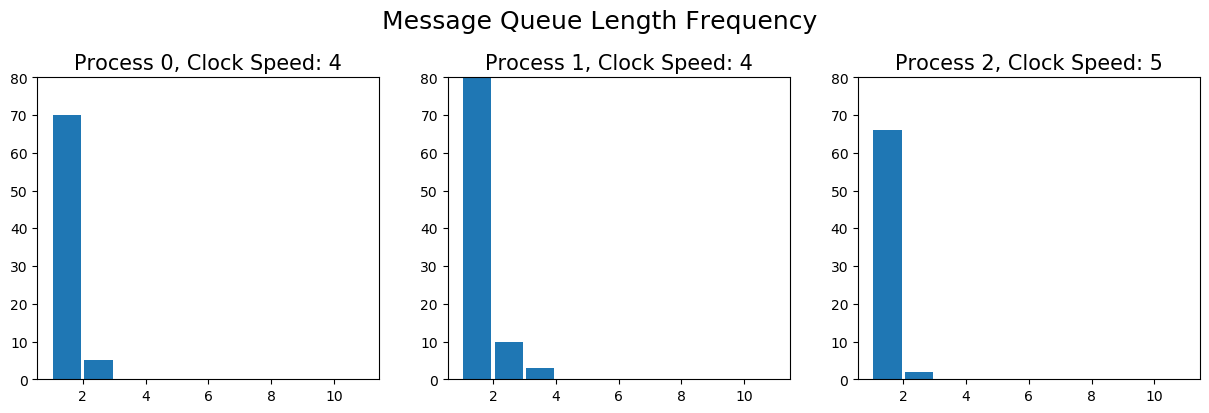


key: 561-param


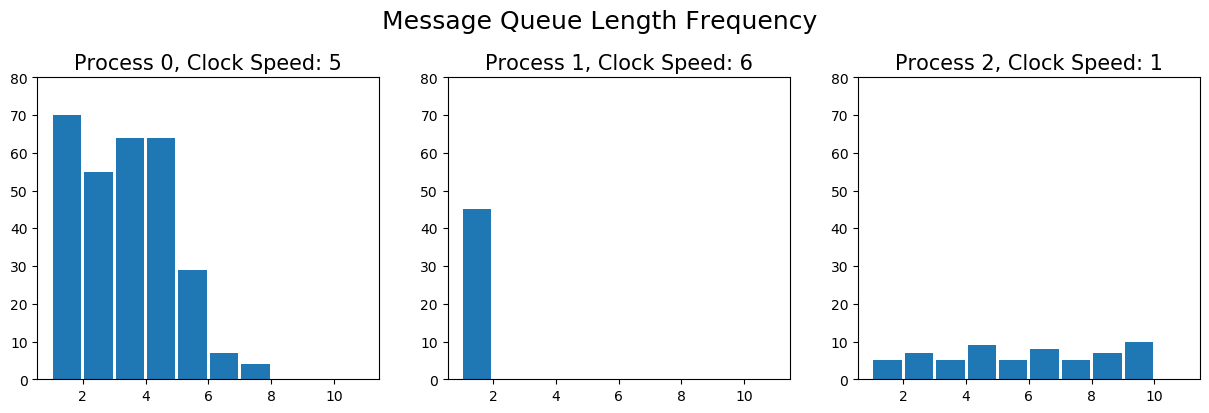

In [158]:
for k in proc_logs.keys():
    print("key:", k)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), dpi = 100)
    for i in range(3):
        proc_info = proc_logs[k][i]
        hist_info = []
        for m in proc_info:
            if 'message queue' in m:
                hist_info.append(int(m[-2]))
        ax[i].hist(hist_info, bins=range(1,12),rwidth=0.9)
        ax[i].set_ylim([0, 80])
        ax[i].set_title('Process '+str(i)+', Clock Speed: '+str(k[i]), fontsize = 15)

    fig.suptitle('Message Queue Length Frequency', fontsize = 18, y=1.05)
    plt.show()
    print()


## Analyzing logical clock values

### Graph logical time vs. system time 

key: 216


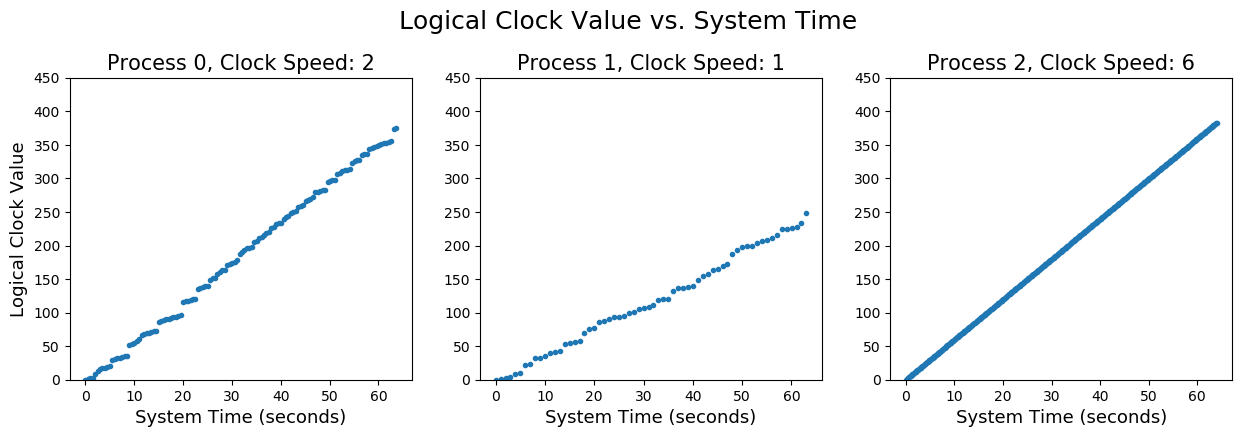

key: 125-param


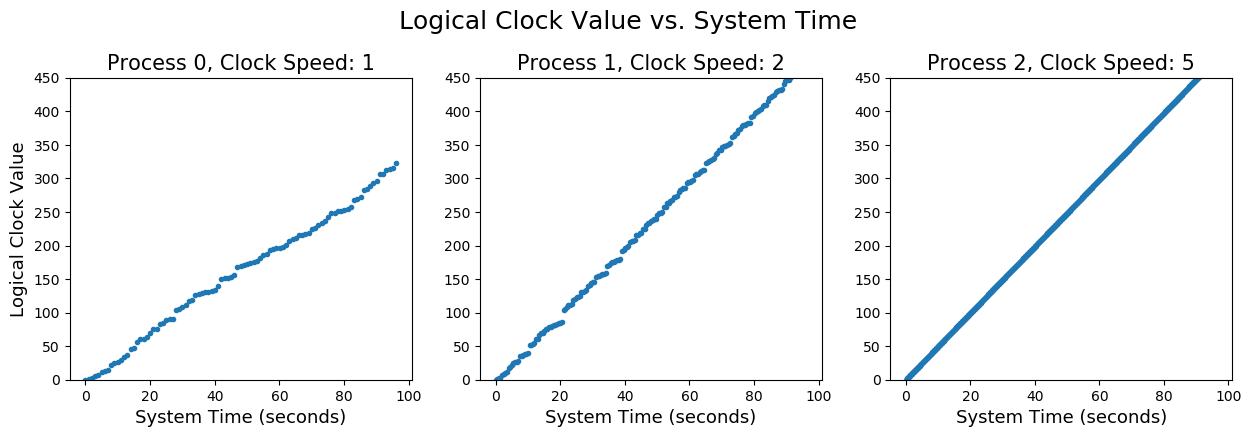

key: 611-param


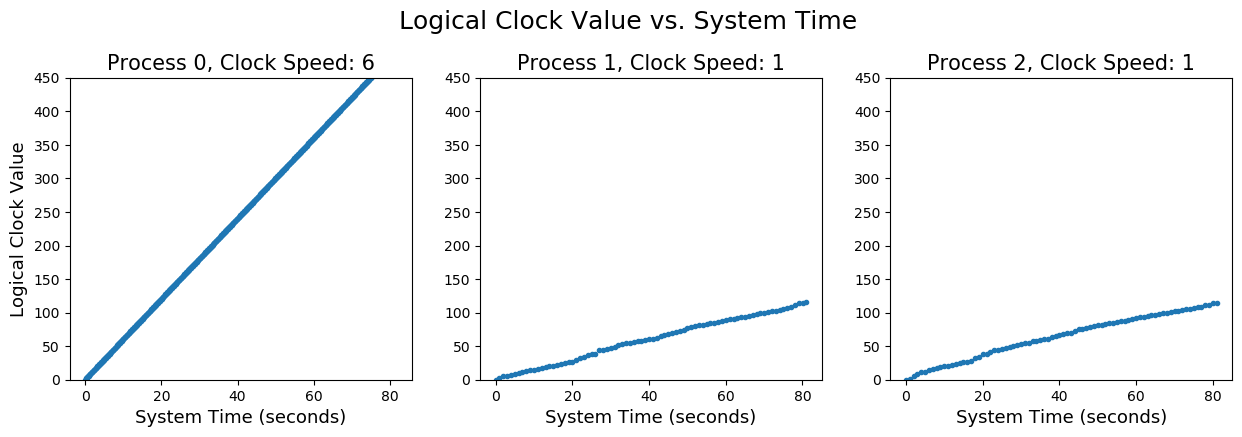

key: 145-param


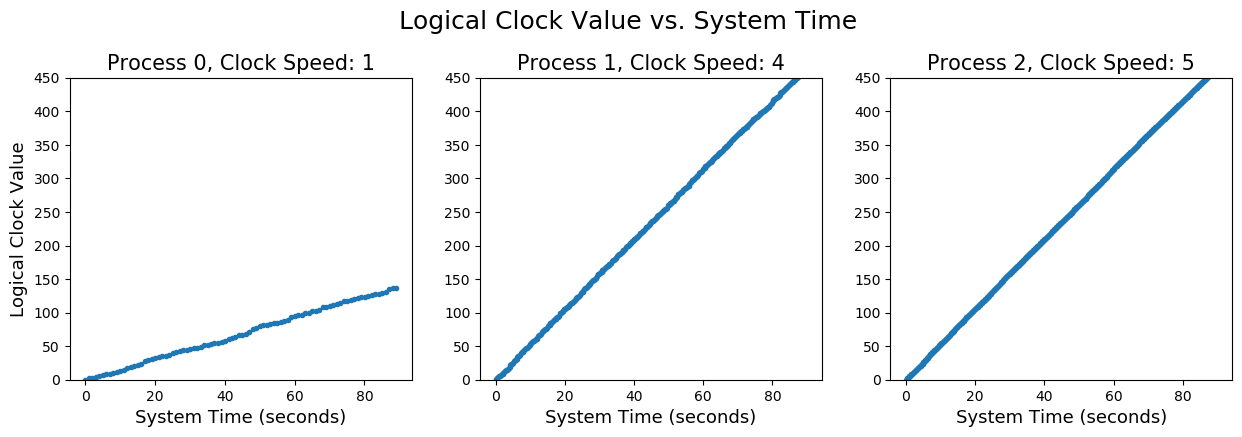

key: 445


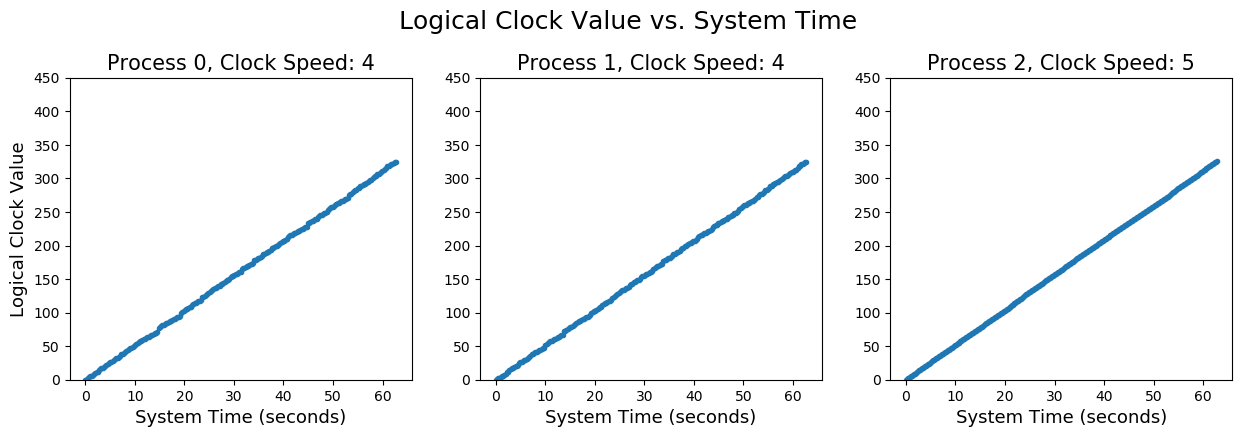

key: 561-param


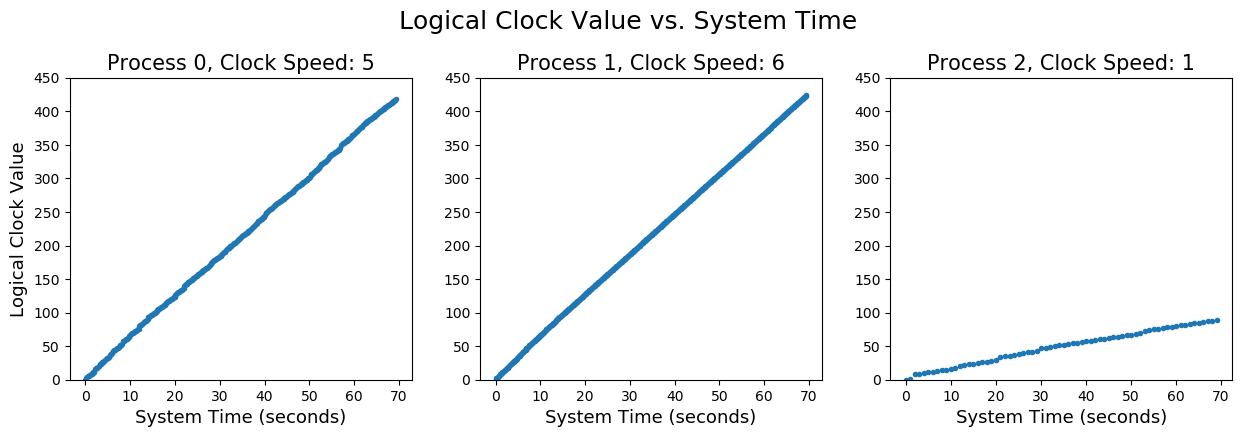

In [194]:
for k in proc_logs.keys():
    print("key:", k)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), dpi = 100)
    for i in range(3):
        proc_info = proc_logs[k][i]
        
        start_time = int(proc_info[0][0:13])
        sys = []
        logical = []
        for m in proc_info:
            sys_time = int(m[0:13])
            elapsed = sys_time - start_time # in milliseconds
            logical_clock_value = int(m.split(',')[1])

            sys.append(elapsed/1000)
            logical.append(logical_clock_value)

        ax[i].scatter(sys, logical, marker = '.')
        ax[i].set_ylim([0, 450])
        ax[i].set_title('Process '+str(i)+', Clock Speed: '+str(k[i]), fontsize = 15)
        if i == 0: ax[i].set_ylabel('Logical Clock Value', fontsize = 13)
        ax[i].set_xlabel('System Time (seconds)', fontsize = 13)
    
    fig.suptitle('Logical Clock Value vs. System Time ', fontsize = 18, y=1.05)
    plt.show()

### Drift

In [197]:
proc_logs.keys()

dict_keys(['216', '125-param', '611-param', '145-param', '445', '561-param'])

In [224]:
examine = ['216']
df_data = []
for k in proc_logs.keys():
    curr = []
    for i in range(3):
        curr.append(int(k[i]))
    print("key:", k)
#     avg_drift = []
    for i in range(3):
        proc_info = proc_logs[k][i]
        drift = []
        for m in proc_info:
            if 'received' in m:
                self_clock = int(m.split(',')[1])
                received_value = int(m.split(' ')[4])
                drift.append(self_clock - received_value)
        curr.append(np.mean(np.array(drift)))
#         print(np.array(drift))
    df_data.append(curr)

key: 216
key: 125-param
key: 611-param
key: 145-param
key: 445
key: 561-param


In [222]:
pd.DataFrame(df_data, columns = ['Proc 0 Speed', 'Proc 1 Speed', 'Proc 2 Speed', 
                             'Proc 0 Avg Drift', 'Proc 1 Avg Drift', 'Proc 2 Avg Drift'])

,Proc 0 Speed,Proc 1 Speed,Proc 2 Speed,Proc 0 Avg Drift,Proc 1 Avg Drift,Proc 2 Avg Drift
0,2,1,6,-2.735294,-1.095238,8.230769
1,1,2,5,-0.729167,-2.119565,4.105263
2,6,1,1,0.000000,0.573171,0.580247
3,1,4,5,1.111111,0.590226,0.936508
4,4,4,5,0.133333,0.350515,1.397059
5,5,6,1,0.750853,1.444444,3.840580
